# Introduction to Linear Regression

## Brief History

Mathematically improving navigation methods based on astronomy.

1772 - Roger Cotes discovers combining different observations yields better estimates of true value.

Invention is confusing...

## Brief Overview

A linear relationship implies some constant straight line relationship.
y = x

When drawing a line of best fit, we want to reduce residual error. Ordinary least squares.

## Ordinary Least Squares

$ y = mx + c $

$ ŷ = β_{0}x_{0} + ... + β_{n}x_{n} $

## Minimising a Cost Function Using Gradient Descent

Used when dealing with more than one feature.

When gradient is 0, we have found the beta values that minimises the cost function.
Takes larger steps at the start and smaller steps as the gradient approaches 0.

# Python Coding Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
# Is there a relationship between how much we spend on advertising and the resulting sales?

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [6]:
# We have made an engineered feature.

In [7]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

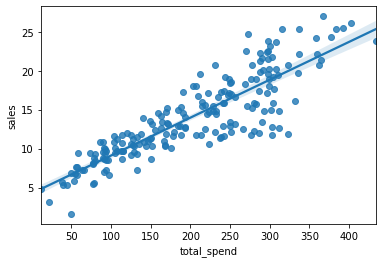

In [8]:
sns.regplot(data=df,x='total_spend',y='sales')

In [9]:
X = df['total_spend']
y = df['sales']

Calculate the beta values that will estimate y hat using np.polyfit()

In $$ ŷ = β_{1}x + β_{0} $$

The betas returned go from highest order to lowest.

In [10]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [11]:
# This is essentially the equation of the line of best fit.

In [12]:
potential_spend = np.linspace(0,500,100)

In [13]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

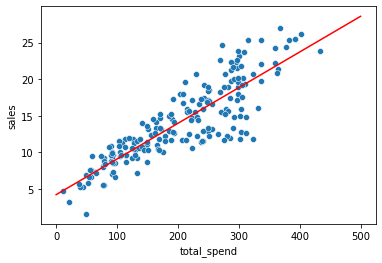

In [14]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [15]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [16]:
predicted_sales

13.98060422

In [17]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
# y = B1x + B0

# y = B3x**3 + B2x**2 + B1x + B0

In [19]:
pot_spend = np.linspace(0,500,100)

In [20]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

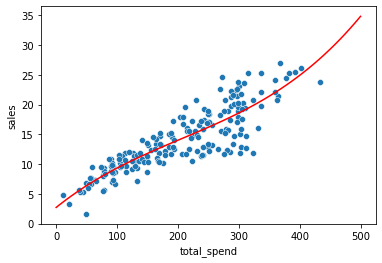

In [21]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(pot_spend,pred_sales,color='red')

In [22]:
# What is better? A straight line fit or polynomial line fit?

# Scikit-Learn

In [23]:
df.drop('total_spend',axis=1,inplace=True)

In [24]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


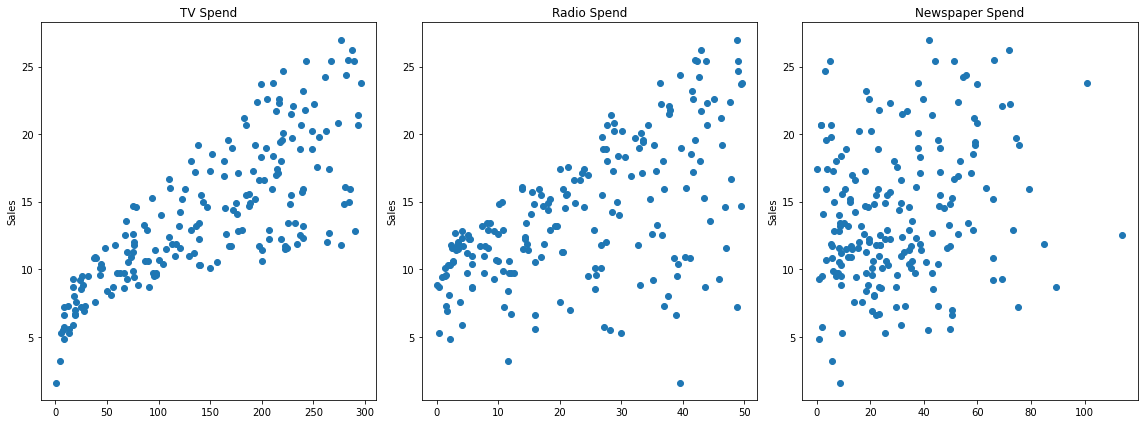

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [26]:
X = df.drop('sales',axis=1)

In [27]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
y = df['sales']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
len(df)

200

In [32]:
len(X_train)

140

In [33]:
len(X_test)

60

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# help(LinearRegression)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Evaluating Regression

Evaluation metrics such as accuracy or recall are NOT useful for regression problems. We need
metrics designed for continuous values.

These are 

- Mean absolute error
- Mean squared error
- Root mean squared error

MAE does not punish large errors. To fix this, we can use MSE. However, it reports units of y-squared. To fix this, we use RMSE.

In [39]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [40]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [41]:
test_predictions = model.predict(X_test)

In [42]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

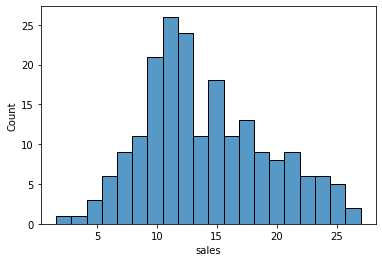

In [45]:
sns.histplot(data=df,x='sales',bins=20)

In [46]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [47]:
# RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993884

## Residual Plots

Often, it is a good idea to separately evaluating residuals and not just use evaluation metrics

We can plot the residual error against the true y values. This plot should look random and have no pattern. If there is a pattern such as a clear curve, it means the data is not suitable for linear regression.

Residual errors should be random and close to a normal distribution.

In [48]:
residuals = y_test - test_predictions

In [49]:
residuals.head()

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
Name: sales, dtype: float64

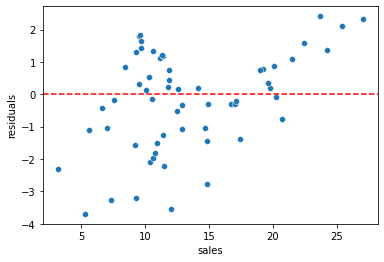

In [50]:
sns.scatterplot(x=y_test,y=residuals)
plt.ylabel('residuals')
plt.axhline(y=0,color='red',ls='--')

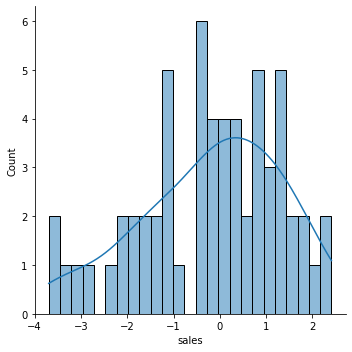

In [51]:
sns.displot(residuals,bins=25,kde=True)

In [52]:
import scipy as sp

In [53]:
# We can also use the normal probability plot to test if the data was suitable

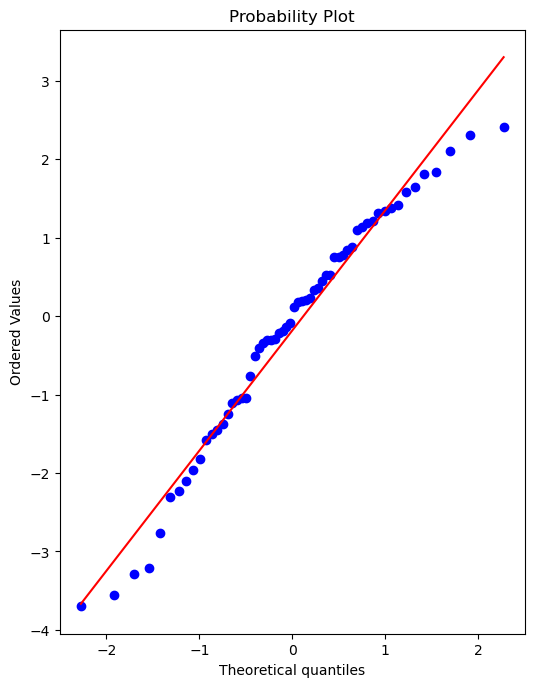

In [54]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals,plot=ax)

## Model Deployment and Coefficient Interpretation

In [55]:
# We are satisfied with the model

In [56]:
final_model = LinearRegression()

In [57]:
final_model.fit(X,y)

LinearRegression()

In [58]:
# Beta coefficients

In [59]:
# Holding all other features fixed, an increase of 1 for radio will increase sales unit by 0.188 
# for example.

In [60]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [61]:
# The coefficients come in the same order as the dataframe.

In [62]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [63]:
# Notice how the beta coefficient for newspaper spend in VERY close to zero. This means that the 
# newspaper spend generally does not increase sales. Which agrees with the newspaper spend vs sales
# plot we did earlier.

## Saving and Loading a Model

In [64]:
from joblib import dump,load

In [65]:
# Saving

In [66]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [67]:
# Loading

In [68]:
loaded_model = load('final_sales_model.joblib')

In [69]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

## New Data to Deploy Our Model

In [70]:
X.shape

(200, 3)

In [71]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [72]:
loaded_model.predict(campaign)

array([13.893032])

# Polynomial Regression

Polynomial regression will address the issues:

- Non-linear feature relationships to the label
- Interaction terms between features

We can use PolynomialFeatures which will return both higher order feature polynomials and the interaction terms between all feature combinations.

For example, converting two features A and B specifying a polynomial of order 2 gives...
$$ 1, A, B, A^2, AB, B^2 $$
Where 1 is the bias

## Creating Polynomial Features

In [73]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [74]:
X = df.drop('sales',axis=1)

In [75]:
y = df['sales']

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [78]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [79]:
poly_features = polynomial_converter.transform(X)

In [80]:
poly_features.shape

(200, 9)

In [81]:
# A shape of 200,9 makes sense because the 9 columns consist of the 3 original, 3 possible 
# interaction terms and the 3 squared terms.

In [82]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [83]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

## Polynomial Regression Training and Evaluation

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# MAKE SURE TEST SIZE AND RANDOM STATE ARE CONSTANT WHEN COMPARING MODELS

In [86]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()

In [89]:
model.fit(X_train,y_train)

LinearRegression()

In [90]:
test_predictions = model.predict(X_test)

In [91]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
MAE = mean_absolute_error(y_test, test_predictions)

In [94]:
MSE = mean_squared_error(y_test, test_predictions)

In [95]:
RMSE = np.sqrt(MSE)

In [96]:
MAE

0.48967980448035603

In [97]:
RMSE

0.6646431757269019

In [98]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [99]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [100]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

# Overfitting and Underfitting or the Bias-Variance Trade Off

How can we choose the optimal degree for the polynomial.
Increasing model complexity in search for better performance leads to the bias variance trade off.

Overfitting fits too much to the noise/variance from the data.
This results in low error on training sets and high error on test and validation sets.
Low bias, high variance.

Underfitting means that the model does not capture the underlying trend of the data and does not fit the data well enough.
Low variance but high bias. Often a result of an excessively simple model.
Leads to poor performance in both training and test sets.

The goal of any supervised machine learning algorithm is to achieve low bias and low variance.

**The inability for a machine learning algorithm to capture the true relationship is called bias. For example, linear regression cannot be used to fit on a curved data set.**

**Variance refers to the amount by which the predictions would change if we fit the model to a different training data set.**

The sweet spot is finding just the right model complexity that yields low bias and low variance.

3 common methods for finding the model complexity sweet spot is regularisation, boosting and bagging.

## Choosing Degree of Polynomial

In [101]:
# Create the different order polynomial
# Split poly features into train/test
# Fit on train
# store/save RMSE for BOTH train AND test
# Plot the results (error vs poly order)

In [102]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [103]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.35170836883993495,
 0.2509342977480478,
 0.1993262296263833,
 5.418481211251738,
 0.1508490881496878,
 0.17175424524217006]

In [104]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742661776808,
 2.575809420796607,
 4.265809430015569,
 1383.4052945431354,
 3733.422566701655,
 95489.26452293464]

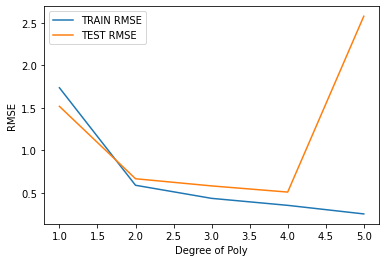

In [105]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [106]:
# Choose 2 or 3 based on the data set and context

## Polynomial Regression - Model Deployment

In [107]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [108]:
final_model = LinearRegression()

In [109]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [110]:
from joblib import dump,load

In [111]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [112]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [113]:
loaded_converter = load('final_converter.joblib')

In [114]:
loaded_model = load('final_poly_model.joblib')

In [115]:
campaign = [[149,22,12]]

In [116]:
transformed_data = loaded_converter.fit_transform(campaign)

In [119]:
transformed_data.shape

(1, 19)

In [120]:
# New predicted sales with polynomial regression

In [118]:
loaded_model.predict(transformed_data)

array([14.64501014])

# Regularisation

# Feature Scaling

Improves the convergence of steepest descent algorithms.

Can increase performance greatly, in some cases, it is necessary. Eg in KNN.
Virtually no real downside.

May be hard to relate back to unscaled data.

Standardisation:
- Rescales data to a standard normal distribution. Mean of 0 and sd of 1

Normalisation:
- Scales all data to values between 0 and 1

.fit() call calculates the necessary stats
.transform() actually scales data and returns new scaled version of the data

We only FIT to TRAINING data. If we use the full data set, it would cause data leakage from the test set.

**Feature Scaling Process:**

- Perform train test split
- Fit to training feature data
- Transform training feature data
- Transform test feature data

It is generally not advised to scale the label.

# Cross Validation

Allows training on all the data and evaluation on all the data to happen.



# Regularisation for Linear Regression

In [121]:
df = pd.read_csv('Advertising.csv')

In [122]:
X = df.drop('sales',axis=1)

In [123]:
y = df['sales']

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [126]:
poly_features = polynomial_converter.fit_transform(X)

In [128]:
poly_features.shape

(200, 19)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [132]:
X_train.shape

(140, 19)

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
scaler.fit(X_train)

StandardScaler()

In [136]:
X_train = scaler.transform(X_train)

In [137]:
X_test = scaler.transform(X_test)

In [138]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.16360242,
         0.54694754,  1.37075536],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.63236858,
         2.6297449 ,  1.95593378],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.72634944,
        -0.61593941, -0.54133745],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.71065643,
        -0.53420112, -0.20690952],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.66805936,
        -0.61031703, -0.54616941],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.61006767,
         0.67881488,  0.45425942]])

# L2 Regularisation - Ridge Regression

Helps reduce the potential for overfitting on training data.

Seeks to minimise an entire error Residual Sum of Squares + Penalty term



In [139]:
# sklearn refers to lambda as alpha within the class call!

In [140]:
from sklearn.linear_model import Ridge

In [142]:
# help(Ridge)

In [143]:
ridge_model = Ridge(alpha=10)

In [144]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [145]:
test_predictions = ridge_model.predict(X_test)

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [147]:
MAE = mean_absolute_error(y_test, test_predictions)

In [148]:
MAE

0.5774404204714173

In [149]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [152]:
RMSE

0.8946386461319676

In [153]:
# To find the best alpha value (or the lambda value in the cost function)

In [151]:
from sklearn.linear_model import RidgeCV

In [161]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_squared_error')

In [162]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_squared_error')

In [163]:
ridge_cv_model.alpha_

0.1

In [164]:
# 0.1 is the best performing alpha

In [165]:
from sklearn.metrics import SCORERS

In [166]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [167]:
test_predictions = ridge_cv_model.predict(X_test)

In [168]:
MAE = mean_absolute_error(y_test,test_predictions)

In [169]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [170]:
MAE

0.4273774884353493

In [171]:
RMSE

0.6180719926954669

In [172]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# L1 Regularisation - Lasso Regression

In [174]:
from sklearn.linear_model import LassoCV

In [181]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [182]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [183]:
lasso_cv_model.alpha_

0.49430709092258285

In [184]:
test_predictions = lasso_cv_model.predict(X_test)

In [186]:
MAE = mean_absolute_error(y_test,test_predictions)

In [188]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [189]:
MAE

0.6541723161252858

In [190]:
RMSE

1.130800102276254

In [191]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

# L1 and L2 Regularisation - Elastic Net

Seeks to minimise RSS and both the squared and absolute value terms.

There are two distinct lambda values for each penalty.

In [192]:
from sklearn.linear_model import ElasticNetCV

In [193]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],eps=0.001,n_alphas=100,max_iter=1000000)

In [194]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [196]:
elastic_model.l1_ratio_

1.0

In [197]:
# Disregards Ridge and says to use Lasso

In [198]:
elastic_model.alpha_

0.004943070909225827

In [199]:
lasso_cv_model.alpha_

0.49430709092258285

In [200]:
test_predictions = elastic_model.predict(X_test)

In [201]:
MAE = mean_absolute_error(y_test,test_predictions)

In [202]:
MAE

0.43350346185900673